## Main task
Given the weather and pollution conditions of the previous 1 hour, it is required to forecast the pollution in the next hour.

### Dataset
This is a dataset that reports on the weather and the level of pollution each hour for five years at the US embassy in Beijing, China.

The data includes the date-time, the pollution called PM2.5 concentration, and the weather information including dew point, temperature, pressure, wind direction, wind speed and the cumulative number of hours of snow and rain. The complete feature list in the raw data is as follows:

1. No: row number
2. year: year of data in this row
3. month: month of data in this row
4. day: day of data in this row
5. hour: hour of data in this row
6. pm2.5: PM2.5 concentration
7. DEWP: Dew Point
8. TEMP: Temperature
9. PRES: Pressure
10. cbwd: Combined wind direction
11. Iws: Cumulated wind speed
12. Is: Cumulated hours of snow
13. Ir: Cumulated hours of rain

### Whole process

#### Import packages
You should probably use: pandas, scikit-learn, keras.

Using TensorFlow backend.


#### Load dataset

#### Descriptive analysis
What should we do here?

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


#### Data transformation
Can we see any required transformation of our data?

In [17]:
# checkpoint
pollution.to_csv("pollution_clean.csv")

#### Data preparation for the RNN model
Remember the structure of the data for LSTM:

[samples, timesteps, features]

In [39]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(8760, 1, 8) (8760,) (35039, 1, 8) (35039,)


#### Define and fit the model

In [43]:
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(X_train, y_train, epochs=50, batch_size=72, validation_data=(X_test, y_test), verbose=2, shuffle=False)

Train on 8760 samples, validate on 35039 samples
Epoch 1/50
 - 1s - loss: 0.0537 - val_loss: 0.0677
Epoch 2/50
 - 0s - loss: 0.0364 - val_loss: 0.0627
Epoch 3/50
 - 0s - loss: 0.0220 - val_loss: 0.0483
Epoch 4/50
 - 0s - loss: 0.0177 - val_loss: 0.0425
Epoch 5/50
 - 0s - loss: 0.0161 - val_loss: 0.0285
Epoch 6/50
 - 0s - loss: 0.0150 - val_loss: 0.0197
Epoch 7/50
 - 0s - loss: 0.0148 - val_loss: 0.0176
Epoch 8/50
 - 0s - loss: 0.0147 - val_loss: 0.0162
Epoch 9/50
 - 0s - loss: 0.0147 - val_loss: 0.0155
Epoch 10/50
 - 0s - loss: 0.0147 - val_loss: 0.0147
Epoch 11/50
 - 0s - loss: 0.0146 - val_loss: 0.0141
Epoch 12/50
 - 0s - loss: 0.0146 - val_loss: 0.0142
Epoch 13/50
 - 0s - loss: 0.0146 - val_loss: 0.0145
Epoch 14/50
 - 0s - loss: 0.0146 - val_loss: 0.0139
Epoch 15/50
 - 0s - loss: 0.0145 - val_loss: 0.0138
Epoch 16/50
 - 0s - loss: 0.0145 - val_loss: 0.0145
Epoch 17/50
 - 0s - loss: 0.0146 - val_loss: 0.0141
Epoch 18/50
 - 0s - loss: 0.0145 - val_loss: 0.0140
Epoch 19/50
 - 0s - loss

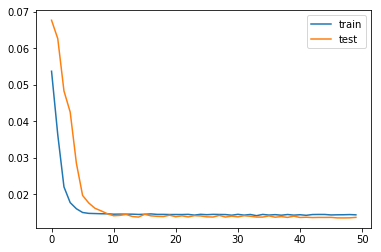

In [46]:
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

## Main task
Given the weather and pollution conditions of the previous 3 hours, it is required to forecast the pollution in the next hour.

In [26]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(8760, 3, 8) (8760,) (35037, 3, 8) (35037,)


In [28]:
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(X_train, y_train, epochs=50, batch_size=72, validation_data=(X_test, y_test), verbose=2, shuffle=False)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Train on 8760 samples, validate on 35037 samples
Epoch 1/50
 - 1s - loss: 0.0393 - val_loss: 0.0419
Epoch 2/50
 - 1s - loss: 0.0234 - val_loss: 0.0224
Epoch 3/50
 - 1s - loss: 0.0210 - val_loss: 0.0198
Epoch 4/50
 - 1s - loss: 0.0200 - val_loss: 0.0196
Epoch 5/50
 - 1s - loss: 0.0200 - val_loss: 0.0205
Epoch 6/50
 - 1s - loss: 0.0195 - val_loss: 0.0188
Epoch 7/50
 - 1s - loss: 0.0190 - val_loss: 0.0187
Epoch 8/50
 - 1s - loss: 0.0188 - val_loss: 0.0175
Epoch 9/50
 - 1s - loss: 0.0185 - val_loss: 0.0175
Epoch 10/50
 - 1s - loss: 0.0177 - val_loss: 0.0169
Epoch 11/50
 - 1s - loss: 0.0171 - val_loss: 0.0170
Epoch 12/50
 - 1s - loss: 0.0169 - val_loss: 0.0167
Epoch 13/50
 - 1s - loss: 0.0162 - val_loss: 0.0171
Epoch 14/50
 - 1s - loss: 0.0160 - val_loss: 0.0174
Epoch 15/50
 - 1s - loss: 0.0157 - val_loss: 0.0169
Epoch 16/50
 - 1s - loss: 0.0152 - val_loss: 0.0177
Epoch 17/50
 - 1s - loss: 0.0152 - val_loss: 0

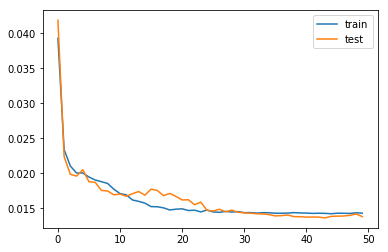

In [29]:
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [40]:
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 26.545
